In [18]:
import matplotlib.pyplot as plt
import cv2

顔の座標= 237 186 301 301


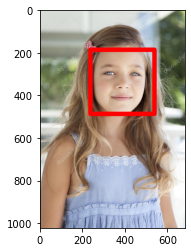

In [6]:
cascade_file ="/Users/miyata-pc/Desktop/Python_AI/OpenCV/haarcascade_frontalface_alt.xml" #正面の顔を検出するファイル
cascade = cv2.CascadeClassifier(cascade_file) #検出器

img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #グレーに変換

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) #顔認証を実行

if len(face_list) == 0:
    print("失敗")
    quit()
    
for (x,y,w,h) in face_list: #認識した部分に印をつける
    print("顔の座標=", x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img,(x,y),(x+w,y+h),red,thickness=20)
    
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
import cv2

def mosaic(img, rect, size):
    (x1,y1,x2,y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2,x1:x2] = i_mos
    return img2

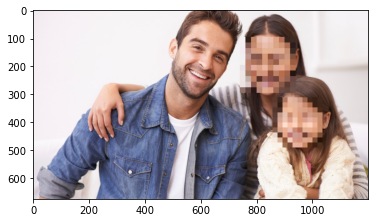

In [20]:
cascade_file ="/Users/miyata-pc/Desktop/Python_AI/OpenCV/haarcascade_frontalface_alt.xml" #正面の顔を検出するファイル。傾いている顔は検出できない
cascade = cv2.CascadeClassifier(cascade_file) #検出器

img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0:
    quit()

for (x,y,w,h) in face_list:
    img = mosaic(img,(x,y,x+w,y+h), 10)
    
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() 